In [2]:
import xarray as xr
import numpy as np
import windrose



Bad key "text.kerning_factor" on line 4 in
/home/anna/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Fauskene wave boy data: available at:  
https://thredds.met.no/thredds/catalog/obs/kystverketbuoy/2020/12/catalog.html  
Sensor url:  
https://www.aanderaa.com/media/pdfs/td316-manual-motus-5729.pdf  

In [8]:
wbFile = "/media/anna/5b62a0f2-ff39-4111-a110-2adc30f1212a/home/anna/waves_datasets/WaveBuoys/Fauskane/15_12_2020/202012_Kystverket-Smartbuoy-Fauskane_AanderaaMotusSensor.nc"
wbData  = xr.open_dataset(wbFile)

wbData

<xarray.Dataset>
Dimensions:                      (time: 671)
Coordinates:
  * time                         (time) datetime64[ns] 2020-12-01T00:30:00 .....
Data variables:
    longitude                    (time) float64 ...
    latitude                     (time) float64 ...
    netTime                      (time) float64 ...
    latitude_qc                  (time) uint8 ...
    longitude_qc                 (time) uint8 ...
    RecordNumber                 (time) float64 ...
    Input_Voltage_Logger         (time) float32 ...
    ActualInterval               (time) float32 ...
    Input_Current                (time) float32 ...
    Input_Voltage                (time) float32 ...
    StDev_Roll                   (time) float32 ...
    StDev_Pitch                  (time) float32 ...
    StDev_Heading                (time) float32 ...
    Roll                         (time) float32 ...
    Pitch                        (time) float32 ...
    Heading                      (time) float32 ...
    Long_Crestedness_Parameters  (time) float32 ...
    First_Order_Spread           (time) float32 ...
    Mean_Spreading_Angle         (time) float32 ...
    Wave_Period_Tz               (time) float32 ...
    Wave_Period_Tmax             (time) float32 ...
    Wave_Height_Trough           (time) float32 ...
    Wave_Height_Crest            (time) float32 ...
    Wave_Height_Hmax             (time) float32 ...
    Wave_Height_Wind_Hm0         (time) float32 ...
    Wave_Height_Swell_Hm0        (time) float32 ...
    Wave_Peak_Period_Wind        (time) float32 ...
    Wave_Peak_Period_Swell       (time) float32 ...
    Wave_Peak_Period             (time) float32 ...
    Wave_Mean_Period_Tm02        (time) float32 ...
    Wave_Peak_Direction_Wind     (time) float32 ...
    Wave_Mean_Direction          (time) float32 ...
    Wave_Peak_Direction_Swell    (time) float32 ...
    Wave_Peak_Direction          (time) float32 ...
    Significant_Wave_Height_Hm0  (time) float32 ...
Attributes:
    title:                            Aanderaa bølgemåler for Kysteverkets sm...
    station_name:                     Aanderaa MOTUS Wave Buoy at Fauskane
    position_ref:                     WGS 84
    buoy_type:                        Aanderaa MOTUS Wave Buoy
    buoy_manufacturer:                Aanderaa Data Instruments AS, P.O.Box 1...
    buoy_serialno:                    N1743017
    water_depth:                      40m
    keywords_vocabulary:              GCMD:GCMD Keywords
    keywords:                         Atmosphere > Atmospheric windsOceans  >...
    geospatial_vertical_positive:     down
    processing_level:                 Missing data has been replaced with fil...
    Conventions:                      CF-1.6, ACDD-1.3
    netcdf_version:                   4
    data_owner:                       Kystverket Rederi, Forsyningsenheten, N...
    data_collecting_contractor:       Aanderaa Data Instruments AS, P.O.Box 1...
    publisher_name:                   MET Norway
    publisher_email:                  post[..]met.no
    publisher_url:                    met.no
    licence:                          Freely distributed. Must credit the sou...
    sensor_manufacturer:              Aanderaa Data Instruments AS, P.O.Box 1...
    sensor_url:                       https://www.aanderaa.com/media/pdfs/td3...
    sensor_type:                      MOTUS Wave sensor 5729 
    sensor_serialno:                  48
    sensor_level:                     1 m a.s.l.
    measurement_update_period:        30 minute
    swell_wind_separation_frequency:  0.1 Hz
    featureType:                      timeSeries
    static_latitude:                  62.56689
    static_longitude:                 5.725221
    geospatial_lat_min:               62.5674
    geospatial_lat_max:               62.5674
    geospatial_lon_min:               5.72654
    geospatial_lon_max:               5.72668
    date_created:                     2020-12-15T00:15:02
    history:               

In [5]:
swellPeriodArr=wbData['Wave_Peak_Period_Swell']
swellDirArr=wbData['Wave_Peak_Direction_Swell']
lat=np.squeeze(wbData['latitude'])
lon=np.squeeze(wbData['longitude'])
swellDirArr= np.squeeze(swellDirArr.astype(int))
#print(waveDirArray)
swellPeriodArr = np.squeeze(swellPeriodArr.round(2))
swellPriodArrV = swellPeriodArr.values
wbData.close()

/home/anna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  
/home/anna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0.5


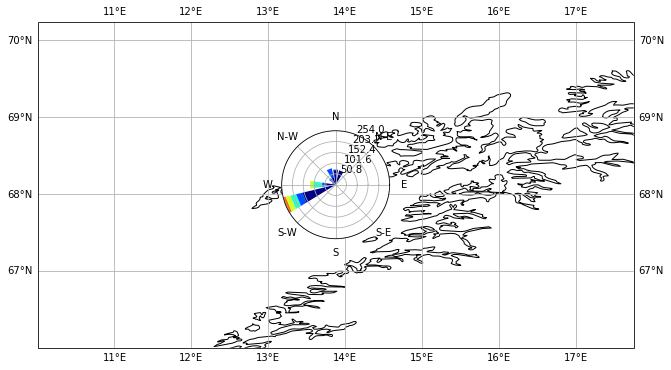

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt



minlon, maxlon, minlat, maxlat = (10, 17.75, 66, 70.24)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
fig.set_alpha(0.5)
# Draw main ax on top of which we will add windroses

main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
#main_ax.set_alpha(0.5)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()


main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_alpha(0.5)

height_deg = 0.1
wrax = inset_axes(main_ax,
        width=1.5,                             # size in inches
        height=1.5,                            # size in inches
        #width="20%",                             # size in inches
        #height="20%",  
        loc='center',                        # center bbox at given position
        #bbox_to_anchor=(lon-height_deg/2, lat-height_deg/2, height_deg, height_deg),
        #bbox_to_anchor=(lon, lat), # position of the axe
        #bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,   # specify the class of the axe
        axes_kwargs={"alpha" : 0.1}
        )
wrax.set_alpha(0.5)
print(wrax.get_alpha())


wrax.bar(swellDirArr,swellPriodArrV)


In [7]:
#Lets check standar deviation:

In [9]:
StDev_Roll=wbData['StDev_Roll']
StDev_Pitch=wbData['StDev_Roll']

lat=np.squeeze(wbData['latitude'])
lon=np.squeeze(wbData['longitude'])

In [10]:
print(StDev_Roll)

<xarray.DataArray 'StDev_Roll' (time: 671)>
array([6.84315, 6.70901, 6.76171, ..., 2.31335, 2.03979, 2.27995],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01T00:30:00 ... 2020-12-15
Attributes:
    Name:         StDev_Roll
    long_name:    Standard deviation roll
    units:        degree
    valid_range:  [-180.  180.]


In [11]:
print(StDev_Pitch)

<xarray.DataArray 'StDev_Roll' (time: 671)>
array([6.84315, 6.70901, 6.76171, ..., 2.31335, 2.03979, 2.27995],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01T00:30:00 ... 2020-12-15
Attributes:
    Name:         StDev_Roll
    long_name:    Standard deviation roll
    units:        degree
    valid_range:  [-180.  180.]
